In [4]:
import requests
from bs4 import BeautifulSoup

In [176]:
from random import randint, random
from time import sleep

def try_get_page_from_server(page_num):
    
    sleep(randint(0, 3) + random()) # чтобы спать случайное число времени и наш айпи не залочили
    
    link = f'https://www.cian.ru/cat.php?deal_type=sale&engine_version=2&object_type%5B0%5D=100&offer_type=flat&p={page_num}&region=1&room1=1'
    page = requests.get(link, headers={'Browser': 'Firefox'})
    if page.status_code != 200:
        return None
    else:
        soup = BeautifulSoup(page.content, 'html.parser')
        return soup
    
    

In [177]:
def try_find_tag(soup_object, tag, params, v=False):
    """
    Функция для получения информации о теге (для простых тегов, которые имею уникальные атрибуты типа class и др)
    """
    try:
        res = soup_object.find(tag, params)
        return res.text
    except Exception as E:
        if v:
            print(E)
        return res
    
def try_find_places(soup_object, tag, params):
    """
    Функция для получения информации об округе, районе и метро
    """
    district = None
    area = None
    metro = None

    res = soup_object.find_all(tag, params)
    for elem in res:
        text = elem.text
        if "АО" in text:
            district = text
        elif "р-н" in text:
            area = text
        elif "м." in text:
            metro = text

    return district, area, metro


In [178]:
def get_page_data(soup, global_data_list):
    """
    Функция, которая принимает soup object для веб-странички, парсит её и возвращает инорфмацию в виде списка
    """
    
    for flat_info, aside_block in zip(soup.find_all("div", attrs={'class':"_93444fe79c--container--kZeLu _93444fe79c--link--DqDOy"}),
                                     soup.find_all("div", attrs={'class':"_93444fe79c--container--kZeLu _93444fe79c--agent-cont--iStzo"})):

        # число комнат, метраж, этажи
        try:
            data = try_find_tag(flat_info, "span", {'class': ""})
            room, meters, floor = data.split(', ')

            nrooms = room.split('-')[0] # число комнат
            meters = meters.split()[0] # метраж
            if "кв." in room:
                flat_or_appart = 'F'
            elif "апарт." in room:
                flat_or_appart = 'A'
            else:
                flat_or_appart = None

            floor, floors_total = floor.split()[0].split('/') # на каком этаже квартира и сколько этажей в доме

        except Exception as E:
            # print(E)
            nrooms, meters, floor, floors_total, flat_or_appart = None, None, None, None, None

        #print(try_find_tag(flat_info, "span", {'data-mark': "OfferSubtitle"}))

        # жилой комплекс
        try:
            zh_comp = try_find_tag(flat_info, "a", {'class': "_93444fe79c--jk--dIktL"})
        except Exception as E:
            # print(E)
            zh_comp = None

        # сдан ли дом. срок сдачи.
        try:
            deadline = try_find_tag(flat_info, "span", {'data-mark': "Deadline"})
        except Exception as E:
            # print(E)
            deadline = None

        # сколько до метро
        try:
            to_metro = try_find_tag(flat_info, "div", {'class': "_93444fe79c--remoteness--q8IXp"})
        except Exception as E:
            # print(E)
            to_metro = None

        # округ, район, метро
        try:
            district, area, metro = try_find_places(flat_info, "a", {'class': "_93444fe79c--link--NQlVc"})
        except Exception as E:
            # print(E)
            district, area, metro = None, None, None

        # цена 
        try:
            mainprice = "".join(try_find_tag(flat_info, "span", {'data-mark': "MainPrice"}).split()[:-1])
        except Exception as E:
            # print(E)
            mainprice = None

        # цена за кв метр
        try:
            price_per_sq_m = "".join(try_find_tag(flat_info, "p", {'data-mark': "PriceInfo"}).split()[:-1])
        except Exception as E:
            # print(E)
            price_per_sq_m = None

        # с отделкой или без (в основном без отделки)
        try:
            otdelka = try_find_tag(flat_info, "span", {'class': "_93444fe79c--label--fCs_v _93444fe79c--color_black_100--kPHhJ _93444fe79c--background_gray6_100--VAXKA"})
        except Exception as E:
            # print(E)
            otdelka = None

        # застройщик
        try:
            developer = try_find_tag(aside_block, "span", {'class': "_93444fe79c--color_current_color--gpi6p _93444fe79c--lineHeight_6u--A1GMI _93444fe79c--fontWeight_bold--ePDnv _93444fe79c--fontSize_16px--RB9YW _93444fe79c--display_block--pDAEx _93444fe79c--text--g9xAG"})
        except Exception as E:
            # print(E)
            developer = None
        
        global_data_list.append([nrooms, meters, floor, floors_total, flat_or_appart, zh_comp, deadline, to_metro,  district, area, metro, mainprice, price_per_sq_m, otdelka, developer])

In [181]:
data_all = []

page = 1
soup = try_get_page_from_server(page)

while soup is not None:
    print(f'Parsing page num {page}')
    get_page_data(soup, data_all)
    page += 1
    soup = try_get_page_from_server(page)

Parsing page num 1
Parsing page num 2
Parsing page num 3
Parsing page num 4
Parsing page num 5
Parsing page num 6
Parsing page num 7
Parsing page num 8
Parsing page num 9
Parsing page num 10
Parsing page num 11
Parsing page num 12
Parsing page num 13
Parsing page num 14
Parsing page num 15
Parsing page num 16
Parsing page num 17
Parsing page num 18
Parsing page num 19
Parsing page num 20
Parsing page num 21
Parsing page num 22
Parsing page num 23
Parsing page num 24
Parsing page num 25
Parsing page num 26
Parsing page num 27
Parsing page num 28
Parsing page num 29
Parsing page num 30
Parsing page num 31
Parsing page num 32
Parsing page num 33
Parsing page num 34
Parsing page num 35
Parsing page num 36
Parsing page num 37
Parsing page num 38
Parsing page num 39
Parsing page num 40
Parsing page num 41
Parsing page num 42
Parsing page num 43
Parsing page num 44
Parsing page num 45
Parsing page num 46
Parsing page num 47
Parsing page num 48
Parsing page num 49
Parsing page num 50
Parsing p

KeyboardInterrupt: 

In [182]:
len(data_all)

8229

In [183]:
import pandas as pd

In [184]:
cols = ['nrooms', 'meters', 'floor', 'floors_total', 'flat_or_appart', "zh_comp", 'deadline', 'to_metro',  'district', 'area', 'metro', 'mainprice', 'price_per_meter', 'otdelka', 'developer']

df = pd.DataFrame(data=data_all, columns=cols)
print(df.shape)
df

(8229, 15)


,nrooms,meters,floor,floors_total,flat_or_appart,zh_comp,deadline,to_metro,district,area,metro,mainprice,price_per_meter,otdelka,developer
0,None,None,None,None,None,ЖК «River Park Towers Кутузовский»,None,5 минут пешком,ЗАО,р-н Дорогомилово,м. Фили,22450632,524547,None,Аеон-Девелопмент
1,None,None,None,None,None,ЖК «ÁLIA»,сдача ГК: 2 кв. 2023 года,7 минут пешком,СЗАО,р-н Покровское-Стрешнево,м. Спартак,16122800,335472,None,ASTERUS
2,1,"51,2",41,66,A,ЖК «NEVA TOWERS»,дом сдан,3 минуты пешком,ЦАО,р-н Пресненский,м. Выставочная,43724800,854000,None,Тауэрс
3,1,"49,8",2,18,F,ЖК «Luzhniki Collection»,сдача ГК: 4 кв. 2026 года,15 минут пешком,ЦАО,р-н Хамовники,м. Воробьёвы горы,33471000,672108,None,Absolute Premium
4,None,None,None,None,None,ЖК «Famous»,сдача ГК: 4 кв. 2023 года,5 минут пешком,ЗАО,р-н Филевский парк,м. Фили,20837134,543908,None,MR Group
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8224,None,None,None,None,None,ЖК «Wellton Towers»,None,10 минут пешком,СЗАО,р-н Хорошево-Мневники,м. Народное Ополчение,21700000,563636,None,Место
8225,1,"44,94",3,24,F,ЖК «Dream Towers»,сдача ГК: 2 кв. 2023 года,5 минут пешком,ЮАО,р-н Нагатинский затон,м. Технопарк,21396534,476113,None,Regions Development
8226,1,"48,3",12,18,F,ЖК «Бадаевский»,сдача ГК: 4 кв. 2025 года,16 минут пешком,ЗАО,р-н Дорогомилово,м. Киевская,50232000,1040000,None,Capital Group
8227,1,"50,2",16,24,F,"ЖК «HIGH LIFE Летниковская, 11»",None,9 минут пешком,ЮАО,р-н Даниловский,м. Павелецкая,33159459,660547,None,Пионер


In [185]:
df.to_csv('data_all.tsv', sep='\t', encoding='utf8')

In [56]:
import pandas as pd
df = pd.read_csv('data_all.tsv', sep='\t').drop(['Unnamed: 0', 'nrooms'], axis=1)
df

,meters,floor,floors_total,flat_or_appart,zh_comp,deadline,to_metro,district,area,metro,mainprice,price_per_meter,otdelka,developer
0,NaN,NaN,NaN,NaN,ЖК «River Park Towers Кутузовский»,NaN,5 минут пешком,ЗАО,р-н Дорогомилово,м. Фили,22450632,524547,NaN,Аеон-Девелопмент
1,NaN,NaN,NaN,NaN,ЖК «ÁLIA»,сдача ГК: 2 кв. 2023 года,7 минут пешком,СЗАО,р-н Покровское-Стрешнево,м. Спартак,16122800,335472,NaN,ASTERUS
2,"51,2",41.0,66.0,A,ЖК «NEVA TOWERS»,дом сдан,3 минуты пешком,ЦАО,р-н Пресненский,м. Выставочная,43724800,854000,NaN,Тауэрс
3,"49,8",2.0,18.0,F,ЖК «Luzhniki Collection»,сдача ГК: 4 кв. 2026 года,15 минут пешком,ЦАО,р-н Хамовники,м. Воробьёвы горы,33471000,672108,NaN,Absolute Premium
4,NaN,NaN,NaN,NaN,ЖК «Famous»,сдача ГК: 4 кв. 2023 года,5 минут пешком,ЗАО,р-н Филевский парк,м. Фили,20837134,543908,NaN,MR Group
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8224,NaN,NaN,NaN,NaN,ЖК «Wellton Towers»,NaN,10 минут пешком,СЗАО,р-н Хорошево-Мневники,м. Народное Ополчение,21700000,563636,NaN,Место
8225,"44,94",3.0,24.0,F,ЖК «Dream Towers»,сдача ГК: 2 кв. 2023 года,5 минут пешком,ЮАО,р-н Нагатинский затон,м. Технопарк,21396534,476113,NaN,Regions Development
8226,"48,3",12.0,18.0,F,ЖК «Бадаевский»,сдача ГК: 4 кв. 2025 года,16 минут пешком,ЗАО,р-н Дорогомилово,м. Киевская,50232000,1040000,NaN,Capital Group
8227,"50,2",16.0,24.0,F,"ЖК «HIGH LIFE Летниковская, 11»",NaN,9 минут пешком,ЮАО,р-н Даниловский,м. Павелецкая,33159459,660547,NaN,Пионер


In [57]:
df.isna().sum()  # Количество пропусков в каждом столбце

meters             3336
floor              3336
floors_total       3336
flat_or_appart     3337
zh_comp            1282
deadline           3809
to_metro             30
district            168
area                387
metro               464
mainprice             0
price_per_meter       0
otdelka            7785
developer             0
dtype: int64

In [58]:
# Очень много пропусков в столбце "otdelka", поэтому удаляем его
df.drop(['otdelka'], axis=1)

,meters,floor,floors_total,flat_or_appart,zh_comp,deadline,to_metro,district,area,metro,mainprice,price_per_meter,developer
0,NaN,NaN,NaN,NaN,ЖК «River Park Towers Кутузовский»,NaN,5 минут пешком,ЗАО,р-н Дорогомилово,м. Фили,22450632,524547,Аеон-Девелопмент
1,NaN,NaN,NaN,NaN,ЖК «ÁLIA»,сдача ГК: 2 кв. 2023 года,7 минут пешком,СЗАО,р-н Покровское-Стрешнево,м. Спартак,16122800,335472,ASTERUS
2,"51,2",41.0,66.0,A,ЖК «NEVA TOWERS»,дом сдан,3 минуты пешком,ЦАО,р-н Пресненский,м. Выставочная,43724800,854000,Тауэрс
3,"49,8",2.0,18.0,F,ЖК «Luzhniki Collection»,сдача ГК: 4 кв. 2026 года,15 минут пешком,ЦАО,р-н Хамовники,м. Воробьёвы горы,33471000,672108,Absolute Premium
4,NaN,NaN,NaN,NaN,ЖК «Famous»,сдача ГК: 4 кв. 2023 года,5 минут пешком,ЗАО,р-н Филевский парк,м. Фили,20837134,543908,MR Group
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8224,NaN,NaN,NaN,NaN,ЖК «Wellton Towers»,NaN,10 минут пешком,СЗАО,р-н Хорошево-Мневники,м. Народное Ополчение,21700000,563636,Место
8225,"44,94",3.0,24.0,F,ЖК «Dream Towers»,сдача ГК: 2 кв. 2023 года,5 минут пешком,ЮАО,р-н Нагатинский затон,м. Технопарк,21396534,476113,Regions Development
8226,"48,3",12.0,18.0,F,ЖК «Бадаевский»,сдача ГК: 4 кв. 2025 года,16 минут пешком,ЗАО,р-н Дорогомилово,м. Киевская,50232000,1040000,Capital Group
8227,"50,2",16.0,24.0,F,"ЖК «HIGH LIFE Летниковская, 11»",NaN,9 минут пешком,ЮАО,р-н Даниловский,м. Павелецкая,33159459,660547,Пионер


In [59]:
len(df['area'].unique()) # Количество уникальных районов, в которых находятся квартиры из собранных данных.

117

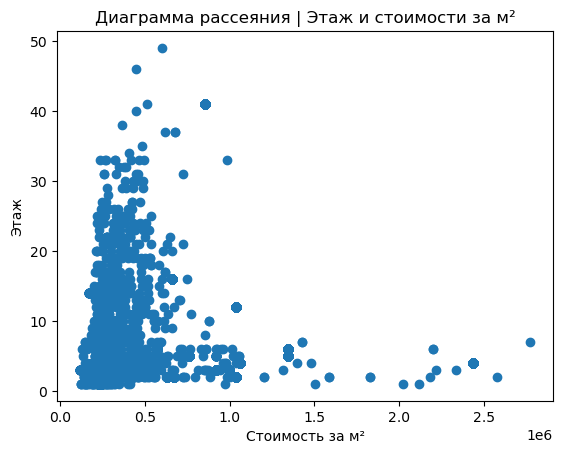

In [74]:
import matplotlib.pyplot as plt

df1 = df[['floor', 'price_per_meter']]
df1.dropna()

fig, ax = plt.subplots()  
ax.scatter(x = df1['price_per_meter'], y = df1['floor'])
plt.title('Диаграмма рассеяния | Этаж и стоимости за м²')
plt.xlabel('Стоимость за м²')
plt.ylabel('Этаж');

In [80]:
df.groupby('flat_or_appart')['price_per_meter'].mean() # В среднем стоимость за м² в апартаментах выше, чем в квартирах.

flat_or_appart
A    818579.312064
F    793512.759321
Name: price_per_meter, dtype: float64

In [83]:
df.groupby('developer')['price_per_meter'].mean().head(10)  # Застройщики с самыми высокими ценами за м²

developer
494 УНР                        661000.000000
AFI Development                424666.666667
ALFA real estate               437853.000000
ALVO Group                     621551.250000
ASTERUS                        336381.831818
ATLANT                         571429.000000
Absolute Premium               673515.889908
Acropol                        414957.000000
Alliance Agency Real Estate    366154.000000
BARNES International Realty    488700.500000
Name: price_per_meter, dtype: float64

In [ ]:
# ML:
# Мы планируем:
# 1) Обучить регресионную модель, которая будет предсказывать стоимость за квадртаный метр на основании
# округа, района, этажа, застройщика, метро, количества времени, за которое до него можно добраться, даты сдачи.
# 2) Обучить модель логистической регрессии на основе стоимости за квадратный метр, этажности здания (и возможно каких-либо 
# других признаков) определять тип жилья (апартаменты или квартира).